In [1]:
import numpy as np
from Deuron import Deuron
from matplotlib import pyplot as plt
import csv
import random

In [2]:
# Fetch main data
data = np.loadtxt('train.txt', delimiter = ',').T

In [3]:
# Get X, Y from data and prepare them
X = data[1:,:] / 255
m = X.shape[1]
y = data[0,:]
Y = np.zeros((10,m))
for i in range(m):
    Y[int(y[i]),i] = 1
del y

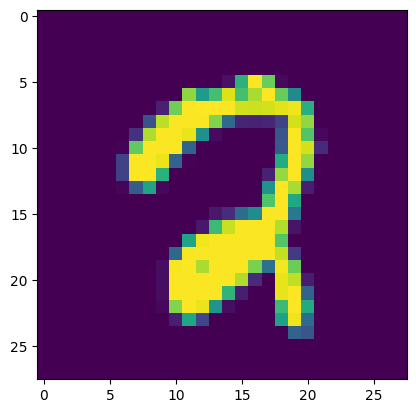

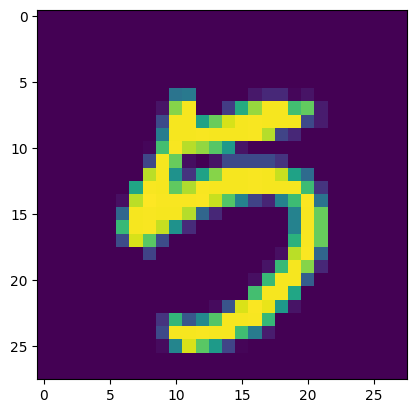

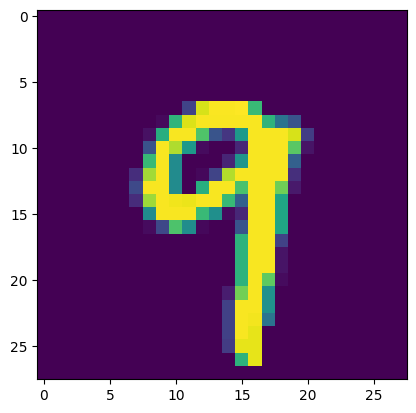

In [4]:
#Train set image samples
elements_to_show = 3
for i in range(elements_to_show):
    random_image_index = random.randint(1, X.shape[1])
    image = X[:, random_image_index]
    image = image.reshape((28,28))
    plt.imshow(image)
    plt.show()

Total Progress	[49/50]		[=================== ]	98.00%		|  Batch Progress	[1312/1313]		[=================== ]	99.92%		|  Cost (J) : 0.07801188810440547

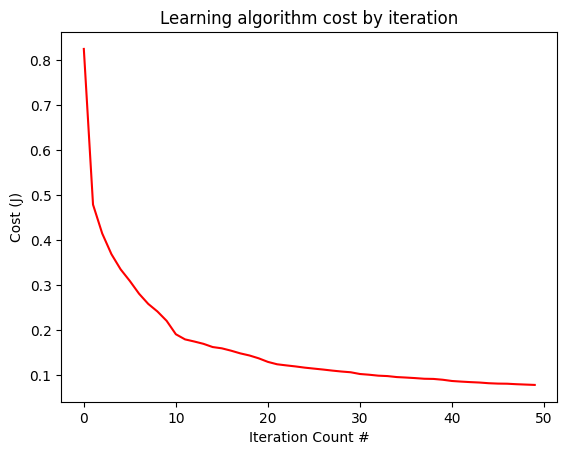


---> Learning time passed:	102.81585788726807 seconds <---



In [5]:
# prepare layer information as list
layer_list = [(128,Deuron.ACTIVATION.RELU), (10, Deuron.ACTIVATION.SOFTMAX)]
# Initialize Deuron object
deuron = Deuron(X,Y,layer_list, Deuron.COST.EXTENDED_CROSS_ENTROPY_COST, 50, 0.03)
# Set regularization
deuron.set_regularization(Deuron.REGULARIZATION.DROPOUT, 0.2)
# Set learning decay as well for time interval 10
deuron.learning_decay(True, time_interval = 10)
deuron.set_mini_batch(32)

# start learning algorithm and record W and B dictionaries (parameter dictionaries) as (W,B) tuple to parameter_data variable
parameter_data = deuron.start()

In [6]:
# print state function can be used as to analyse the current state of the deuron object
deuron.print_state()

Deuron Object Current State
Nx	784
Layer list	[(128, 'Relu'), (10, 'Softmax')]
Cost type	Extended_Cross_Entropy_Cost
Learning rate alpha	0.03
Has learned	True
Batch Size	32
Transform state for X	No_Transform
Transform state for Y	No_Transform
Regularization Type	Dropout	Keep Probability	0.2
Optimizer	No_Optimizer
Learning Decay	True	Decay Rate	0.95	Time Interval	10


In [7]:
# States will record as zip file in current directory which includes parameter datas as W.npy, B.npy, and 1 more .deuronstate file that holds the state of the deuron object
# main purpose is to record any state of object for further trainings
# Please input Y for confirm save state
# then enter a new state name to record
deuron.save_state()

In [8]:
# import test set, scale by dividing 255 and then use test function to make predictions
data_test = np.loadtxt('test.txt', delimiter = ',').T
X_test = data_test / 255

prediction = deuron.test(X_test)

In [9]:
numerical_prediction = prediction.argmax(axis = 0)

Answer is:		0


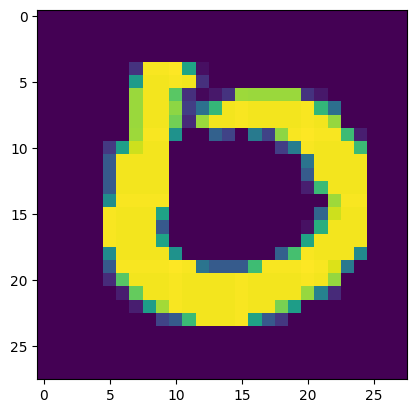

Answer is:		6


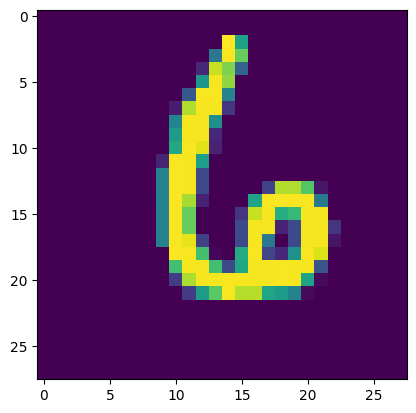

Answer is:		5


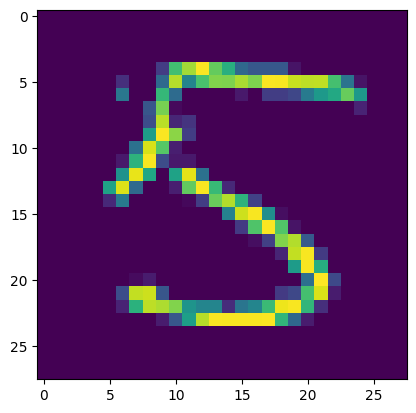

Answer is:		1


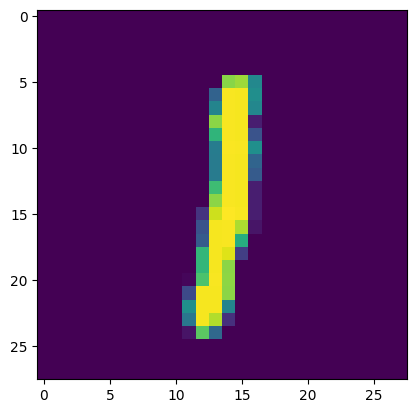

Answer is:		1


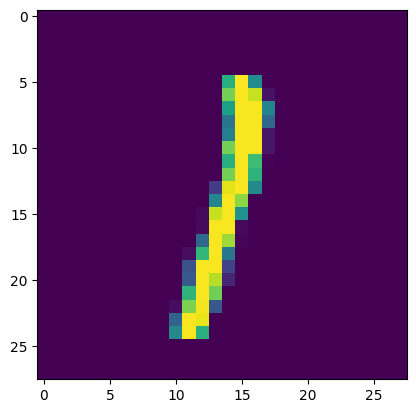

In [11]:
#change this to randomly show the number of tests 
elements_to_show = 5
for i in range(elements_to_show):
    random_image_index = random.randint(1, X_test.shape[1])
    print("Answer is:\t\t"+str(numerical_prediction[random_image_index]))
    image = X_test[:, random_image_index]
    image = image.reshape((28,28))
    plt.imshow(image)
    plt.show()

In [12]:
# Lets make new object to continue training with the same set and the state that we've recorded above
# Please enter the name of the state (with not .zip, just name)
deneme = Deuron.create_with_state(X, Y, 50)

In [13]:
deneme.print_state()

Deuron Object Current State
Nx	784
Layer list	[(128, 'Relu'), (10, 'Softmax')]
Cost type	Extended_Cross_Entropy_Cost
Learning rate alpha	0.03
Has learned	False
Batch Size	32
Transform state for X	No_Transform
Transform state for Y	No_Transform
Regularization Type	Dropout	Keep Probability	0.2
Optimizer	No_Optimizer
Learning Decay	True	Decay Rate	0.95	Time Interval	10


Total Progress	[49/50]		[=================== ]	98.00%		|  Batch Progress	[1312/1313]		[=================== ]	99.92%		|  Cost (J) : 0.02842546945037467

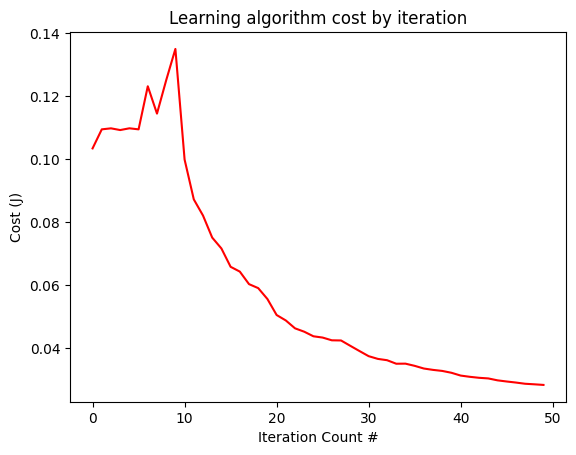


---> Learning time passed:	132.7970314025879 seconds <---



({'1': array([[-0.05368342, -0.01146583, -0.01117285, ...,  0.09870938,
           0.10372821,  0.04009615],
         [-0.05007654, -0.03544816, -0.04481636, ..., -0.05942645,
           0.02771865, -0.05468284],
         [ 0.00586158, -0.05817532,  0.02996139, ...,  0.020023  ,
           0.0772817 , -0.04315613],
         ...,
         [-0.02360332,  0.08927322,  0.00380704, ..., -0.08472259,
          -0.02564772,  0.02037169],
         [ 0.00057732,  0.11055744,  0.0914362 , ..., -0.02206987,
           0.08109258, -0.02547154],
         [-0.00734407, -0.01158362,  0.00723328, ...,  0.01027164,
          -0.07320969, -0.10586058]]),
  '2': array([[-0.17623091, -0.40269107, -0.08567868, ..., -0.21474369,
          -0.33321463,  0.25635321],
         [ 0.42914174,  0.24589297,  0.2964177 , ..., -0.16264776,
          -0.94869811, -0.0407252 ],
         [-0.35393847,  0.37842999, -0.5030168 , ...,  0.50998452,
          -0.05709673,  0.19127923],
         ...,
         [-0.08479856,  

In [14]:
deneme_parameters = deneme.start()

In [15]:
# You may save this state again (because it is the best state that we've achieved until now for this data set)
deneme.save_state()

In [16]:
# make predictions for deneme object 
prediction_deneme = deneme.test(X_test)
numerical_prediction_deneme = prediction.argmax(axis = 0)

Answer is:		1


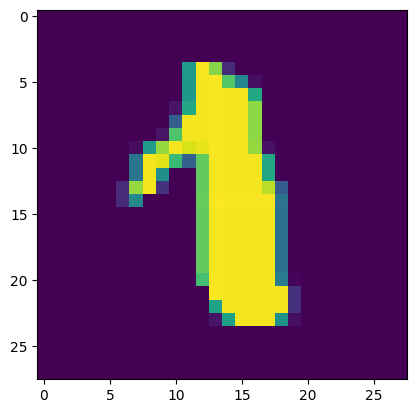

Answer is:		7


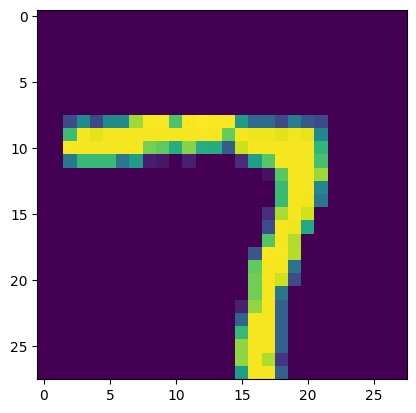

Answer is:		0


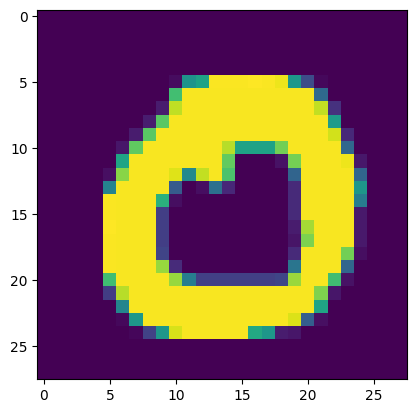

Answer is:		1


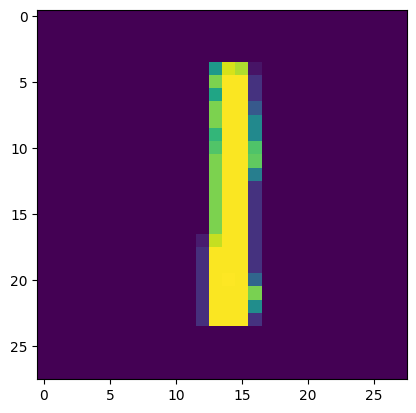

Answer is:		3


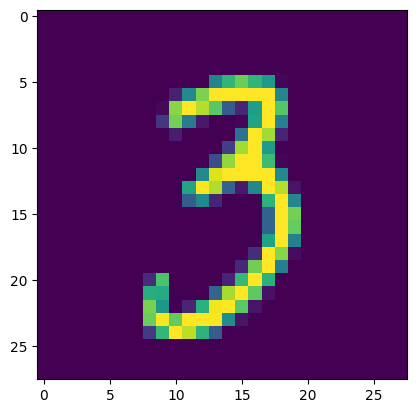

Answer is:		3


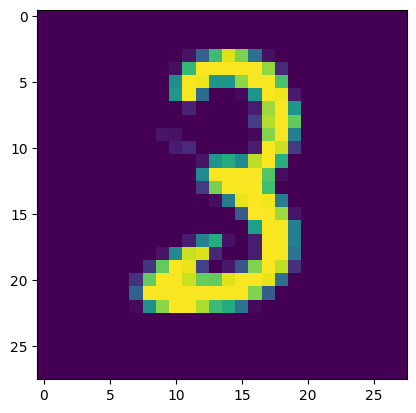

Answer is:		9


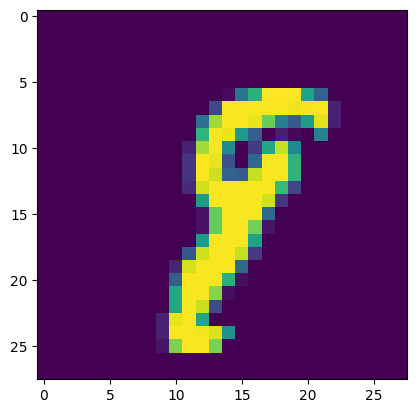

In [19]:
#change this to randomly show the number of tests 
elements_to_show = 7
for i in range(elements_to_show):
    random_image_index = random.randint(1, X_test.shape[1])
    print("Answer is:\t\t"+str(numerical_prediction_deneme[random_image_index]))
    image = X_test[:, random_image_index]
    image = image.reshape((28,28))
    plt.imshow(image)
    plt.show()